In [55]:
import numpy as np
import networkx as nx
import network
import base
import igraph as ig
import itertools
import pandas as pd
from skimage.morphology import disk
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
G = lattice(8,8)
len(G.edges())

NameError: name 'lattice' is not defined

In [ ]:
def lattice(absc,ordi,w_absc=None,w_ordi=None):
    x = np.arange(0, absc, 1)
    y = np.arange(0, ordi, 1)
    positions =list(itertools.product(x, y))
    G = nx.Graph()
    node_dict_list = list()
    for _id,pos in zip(range(len(positions)),positions):
        node_dict_list.append((_id,dict([('o',pos)])))
    G.add_nodes_from(node_dict_list)
    
    for i in range(len(G.nodes)):
        for j in range(len(G.nodes)):
            if (G.nodes[i]['o'][0]-G.nodes[j]['o'][0])==1 and (G.nodes[i]['o'][1]==G.nodes[j]['o'][1]):
                G.add_edge(i,j,weight=w_absc)
            if (G.nodes[i]['o'][1]-G.nodes[j]['o'][1])==1 and (G.nodes[i]['o'][0]==G.nodes[j]['o'][0]):
                G.add_edge(i,j,weight=w_ordi)
    return G

def removal(G,HRate,VRate):
    def HV(node_i, node_j):
        H = abs(node_i['o'][0] - node_j['o'][0]) == 1
        V = abs(node_i['o'][1] - node_j['o'][1]) == 1
        return H, V
        
    for i,j in G.edges():
        H,V = HV(G.nodes(data=True)[i], G.nodes(data=True)[j])
        if H and np.random.rand() < HRate:
            G.remove_edge(i, j)
        if V and np.random.rand() < VRate:
            G.remove_edge(i, j)
            
    return G



In [ ]:
G = lattice(50,50)
Ax_df = []
Ay_df = []
HRate_df = []
VRate_df = []
for i in np.linspace(0.0,0.01,5):
    for j in np.linspace(0.0,0.01,5):
        Gb = removal(G, i,j)
        Ax,Ay = gyration_moments_3(ig.Graph.from_networkx(Gb), sampling=0.1)
        Ax_df.append(Ax)
        Ay_df.append(Ay)
        HRate_df.append(i)
        VRate_df.append(j)
        
df = pd.DataFrame(columns=['HRate','VRate','Ax','Ay'])
df['HRate'] = HRate_df
df['VRate'] = VRate_df
df['Ax'] = Ax_df
df['Ay'] = Ay_df
df['Ax/Ay'] = df['Ax']/df['Ay']
df['H/R'] = df['HRate']/df['VRate']

In [ ]:

import matplotlib.pyplot as plt
plt.scatter(df[df.VRate == 0.]['Ax/Ay'],df[df.VRate == 0.].index)

In [ ]:
df[df.VRate == 0.]

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['VRate'],df['Ay'])
plt.show()

# Particle gyrations

<ipython-input-178-d193213a1f0a>:6: RuntimeWarning: covariance is not positive-semidefinite.
  points = np.random.multivariate_normal(mean=(1,1), cov=cov, size=(1000,))


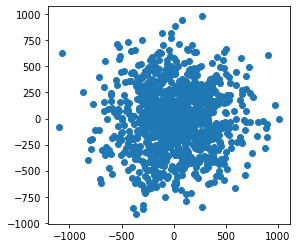

In [178]:
import numpy as np
import matplotlib.pyplot as plt
cov=[[1.5, 0.9], [0.9, 1]]
#cov=A
cov=np.array([[  747.28416, 94775.14574],[94775.14574,  5443.88611]])
points = np.random.multivariate_normal(mean=(1,1), cov=cov, size=(1000,))
points = np.vstack((points.T,np.zeros(len(points)))).T
fix,ax = plt.subplots()

thetar = np.pi/4
r = R.from_quat([0, 0, np.cos(thetar/2), np.sin(thetar/2)])
mat = r.as_matrix()

ax.scatter(points.T[0],points.T[1])
plt.axis('scaled')
plt.show()



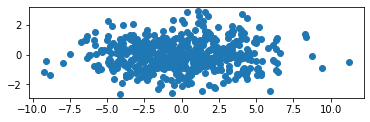

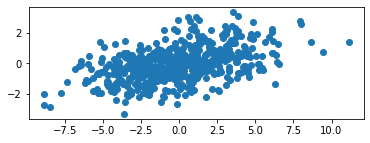

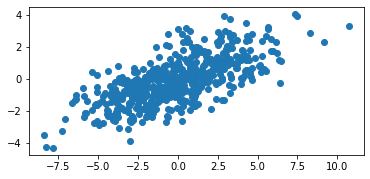

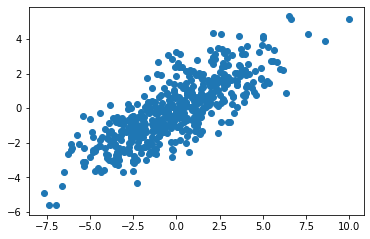

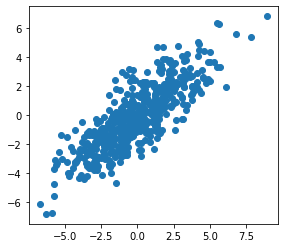

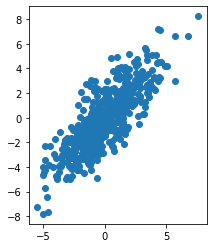

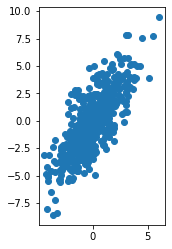

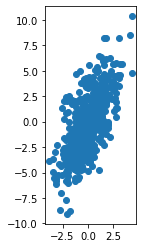

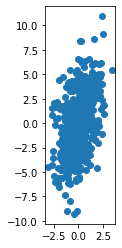

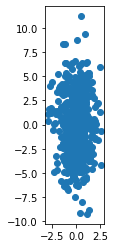

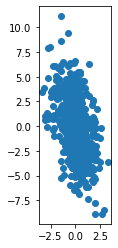

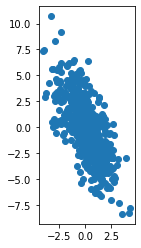

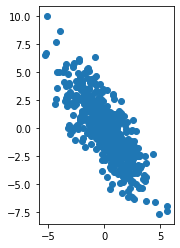

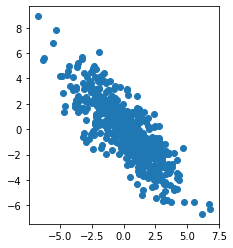

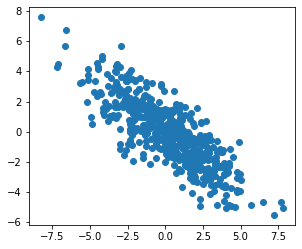

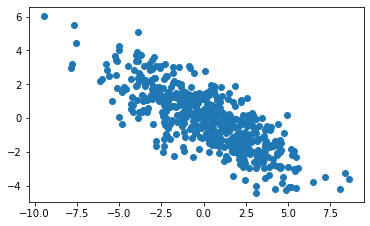

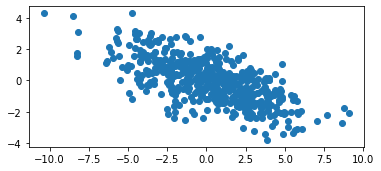

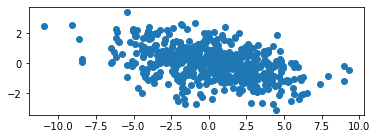

In [246]:
M = []
Axl = []
Ayl = []
points = np.random.multivariate_normal(mean=(0,0), cov=[[10, 0], [0, 1]], size=(500,))
points = np.vstack((points.T,np.zeros(len(points)))).T
from scipy.spatial.transform import Rotation as R
thetas = np.linspace(0,170,18)
#thetas = (0,0.1)
for theta in thetas:
    thetar = theta*np.pi/180
    r = R.from_quat([0, 0, np.cos(thetar/2), np.sin(thetar/2)])
    mat = r.as_matrix()
    pointsN = np.matmul(points, mat)
    plt.scatter(pointsN.T[0], pointsN.T[1])
    plt.axis('scaled')
    plt.show()
    Ax,Ay,Axy,Ayx = 0,0,0,0
    for i in pointsN:
        for j in pointsN:
            Ax  = Ax  + (i[0]-j[0])**2
            Ay  = Ay  + (i[1]-j[1])**2
            Axy = Axy + (i[0]-j[1])*(i[1]-j[0])
    M.append(np.array([[Ax,Axy,0],[Axy,Ay,0],[0,0,0]]))

M = np.asarray(M)  

evals,rot_mat = np.linalg.eig(M)
r = R.from_matrix(rot_mat)
r = r.as_rotvec(degrees=True)
r

points3 = np.matmul(points, rot_mat)

In [247]:
M

array([[[ 5186585.20518729,    64457.58560151,        0.        ],
        [   64457.58560151,   496293.42297046,        0.        ],
        [       0.        ,        0.        ,        0.        ]],

       [[ 5020974.87667058,   865249.44053473,        0.        ],
        [  865249.44053473,   661903.75148701,        0.        ],
        [       0.        ,        0.        ,        0.        ]],

       [[ 4592480.39278645,  1560455.04680972,        0.        ],
        [ 1560455.04680972,  1090398.23537122,        0.        ],
        [       0.        ,        0.        ,        0.        ]],

       [[ 3952784.51219616,  2066222.34816753,        0.        ],
        [ 2066222.34816753,  1730094.11596154,        0.        ],
        [       0.        ,        0.        ,        0.        ]],

       [[ 3179043.99900457,  2321548.34373425,        0.        ],
        [ 2321548.34373425,  2503834.62915316,        0.        ],
        [       0.        ,        0.        ,        

In [250]:
_,rot_mat = np.linalg.eig(M[2])
r = R.from_matrix(rot_mat)
r = r.as_rotvec(degrees=True)


array([ 0.        ,  0.        , 20.85304918])

[[[19796118.55569053    89513.95946511        0.        ]
  [   89513.95946511  2096422.53206911        0.        ]
  [       0.                0.                0.        ]]

 [[19795730.92465358   120431.77033364        0.        ]
  [  120431.77033364  2096810.16310452        0.        ]
  [       0.                0.                0.        ]]]
[[0.         0.         0.28975623]
 [0.         0.         0.38984333]]
[[[ 0.99998721 -0.00505718  0.        ]
  [ 0.00505718  0.99998721  0.        ]
  [ 0.          0.          1.        ]]

 [[ 0.99997685 -0.006804    0.        ]
  [ 0.006804    0.99997685  0.        ]
  [ 0.          0.          1.        ]]]


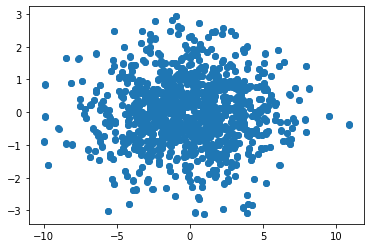

In [161]:
print(M)
print(r)
print(rot_mat)
plt.scatter(points3.T[0],points3.T[1])
plt.show()

In [ ]:
plt.scatter(np.linspace(0,170,36),M[:,0,0], label=r'$S_{xx}$')
plt.scatter(np.linspace(0,170,36),M[:,1,1], label=r'$S_{yy}$')
plt.ylabel(r'$S_{xx}\/\/or\/\/S_{yy}$')
plt.legend()
plt.show()

In [ ]:
for theta,m in zip(np.linspace(0,170,36),M):
    w, v = np.linalg.eig(m)
    print(v)

# Model networks

In [ ]:
import network
g = network.ResistiveNetwork('TestData/Model_Systems/Rectangle1')
g.binarize()
Ax_df = []
Ay_df = []
O_eff_df = []
thetas = np.linspace(0,350,72)
for theta in thetas:
    g.stack_to_circular_gsd(274,name='rot_skel.gsd', rotate=theta)
    g.G_u()
    g.potential_distribution(0, [0,100], [540-100,540], R_j=100)
    L = g.L
    Q = np.linalg.pinv(L)
    O_eff = Q[-1,-1]+Q[-2,-2]-2*Q[-1,-2]
    Ax_df.append(Ax)
    Ay_df.append(Ay)
    O_eff_df.append(O_eff)
    base.Node_labelling(g, g.P, 'P', 'Results.gsd')
    Ax,Ay = gyration_moments_3(g.Gr,sampling=1)
    
df = pd.DataFrame(columns=['Theta', 'Ax','Ay', 'O_eff'])
df['Theta'] = thetas
df['Ax'] = Ax_df
df['Ay'] = Ay_df
df['O_eff'] = O_eff_df

In [ ]:
df['O_eff_PERP'] = np.roll(df['O_eff'].values, -9)
df['Selectivity'] = (df['O_eff_PERP']/df['O_eff'])**1
df['Ax/Ay'] = df['Ax']/df['Ay']

In [ ]:
#Ax/Ay - Selectivity
fig, ax1 = plt.subplots()

ax1.scatter(df['Theta'],df['O_eff_PERP'], label=r'$Y_\Omega$', color='tab:blue')
ax1.set_xlabel(r'$\theta\/(deg)$')
ax1.set_ylabel(r'$Y_\Omega$')
ax1.set_yscale('log')

ax2 = ax1.twinx()
ax2.scatter(df['Theta'],df['Ax'], label=r'$A_x/A_y$', color='tab:orange')
#ax2.scatter(df['Theta'],df['Ax/Ay'], label=r'$A_x/A_y$', color='tab:orange')
ax2.set_ylabel(r'$A_x/A_y$')
ax2.set_yscale('log')

fig.legend()
plt.show()

In [ ]:
plt.scatter(df['Theta'],df['Ax'])
plt.scatter(df['Theta'],df['Ay'])
plt.yscale("log")
plt.show()

In [ ]:
df[0:30]

# Experimental networks: AgNWN

In [ ]:

import pandas as pd
df = pd.read_csv('/Users/alaink/Software/StructuralGTEdits/StructuralGT/TestData/AgNWN_10um/Binarized/Rotations/ObjectImplementation/AgNWN_10um_Rweight_circleGSD_distanceGyration.csv')


In [ ]:
df['O_eff_PERP'] = np.roll(df['O_eff'].values, -9)
df['Selectivity'] = (df['O_eff_PERP']/df['O_eff'])**1
df['Ax/Ay'] = df['Ax']/df['Ay']
plt.scatter(df['Theta'], 1/df['Selectivity'])
plt.scatter(df['Theta'], df['Ax/Ay'])
plt.yscale('log')
plt.show

In [ ]:
df['O_eff_PERP'] = np.roll(df['O_eff'].values, -9)
df['Selectivity'] = (df['O_eff_PERP']/df['O_eff'])**1
df['Ax/Ay'] = df['Ax']/df['Ay']
plt.scatter(df['Theta'], df['Ax'])
plt.scatter(df['Theta'], df['Ay'])
plt.yscale('log')
plt.show

In [ ]:
import gsd.hoomd
traj = gsd.hoomd.open(name='/Users/alaink/Software/StructuralGTEdits/StructuralGT/TestData/AgNWN_10um/Binarized/Rotations/ObjectImplementation/Cweight_circle_displacement.gsd')
AxL = []
AyL = []
for snap in traj:
    points = snap.particles.position[snap.particles.typeid==1]
    Ax,Ay = 0,0
    for i in points:
        for j in points:
            Ax  = Ax  + (i[0]-j[0])**2
            Ay  = Ay  + (i[1]-j[1])**2
    AxL.append(Ax)
    AyL.append(Ay)


# Experimental networks: Mxene (with diagonalisation)

In [26]:
def gyration_moments_3(G, sampling=1):
#Serial implementation
    Ax=0
    Ay=0
    Axy=0
    Ayx=0
    node_count = np.asarray(list(range(G.vcount())))
    mask = np.random.rand(G.vcount()) > (1-sampling)
    trimmed_node_count = node_count[mask]
    for i in trimmed_node_count:
        for j in trimmed_node_count:
            if i >= j:    #Symetric matrix
                continue
            
            path = G.get_shortest_paths(i,to=j, weights='Resistance')
            Ax_term  = 0
            Ay_term  = 0
            Axy_term = 0
            Ayx_term = 0
            for hop_s,hop_t in zip(path[0][0:-1],path[0][1::]):
                weight = G.es[G.get_eid(hop_s,hop_t)]['Conductance']
                Ax_term  = Ax_term  + weight*(((int(G.vs[hop_s]['o'][0])-int(G.vs[hop_t]['o'][0])))**2)
                Ay_term  = Ay_term  + weight*(((int(G.vs[hop_s]['o'][1])-int(G.vs[hop_t]['o'][1])))**2)
                Axy_term = Axy_term + weight*(((int(G.vs[hop_s]['o'][1])-int(G.vs[hop_t]['o'][1])))*((int(G.vs[hop_s]['o'][0])-int(G.vs[hop_t]['o'][0]))))
                #Ayx_term = Ayx_term + ((weight*(int(G.vs[hop_s]['o'][0])-int(G.vs[hop_t]['o'][1])))*((int(G.vs[hop_s]['o'][1])-int(G.vs[hop_t]['o'][0]))))
            Ax  = Ax  + (Ax_term)
            Ay  = Ay  + (Ay_term)
            Axy = Axy + (Axy_term)
            #Ayx = Ayx + (Ayx_term)
            A = np.array([[Ax,Axy,0],[Axy,Ay,0],[0,0,0]])
    return A

In [58]:
scale=1

img_options={"Thresh_method":1, "gamma": 3.45, "md_filter": 1, "g_blur": 1, "autolvl": 1,
             "fg_color":1, "laplacian": 0, "scharr":0, "sobel":0 , "lowpass": 1, "asize": int((103*scale))*2+1,
             "bsize":int((30*scale))*2+1, "wsize": int((10*scale))*2+1, "thresh": 127}


#N = network.ResistiveNetwork('TestData/AgNWN_10um')
N = network.ResistiveNetwork('TestData/AgNWN_iso/Single')
#N = network.ResistiveNetwork('TestData/AgNWN_Aligned/GT_Subset/30_003')
#N = network.ResistiveNetwork('TestData/AgNWN_Aligned/GT_Subset/100_021')
#N = network.ResistiveNetwork('TestData/Mxene/2')
#N = network.ResistiveNetwork('TestData/AgNWN_iso/LargeSet/200s/004')
#N.binarize(options_dict=img_options)


"""
img_bin = cv.imread(N.stack_dir+'/slice0.tiff') #Original image
image_center = tuple(np.array(img_bin.shape[1::-1]) / 2)
short_length = img_bin.shape[img_bin.shape == max(img_bin.shape)]
long_length = max(img_bin.shape)
ISS = (short_length**2/2)**0.5
L1 = int((long_length - ISS)/2)
L3 = int(ISS+L1)
L2 = int((short_length - ISS)/2)
L4 = int(ISS+L2)
o_corn_crop = [L2,L1,L4,L3]
dims = L2-L1
"""

N.stack_to_circular_gsd(875, debubble=[disk(2)])
#N.stack_to_gsd(crop=[L1,L3,L2,L4], debubble=[disk(2)])
N.G_u()

N.Gr = base.sub_G(N.Gr)
measuring_graph = base.add_weights(N, weight_type='Resistance', R_j=5)
measuring_graph = base.add_weights(N, weight_type='Conductance', R_j=5)


A = gyration_moments_3(measuring_graph,sampling=0.2)


from scipy.spatial.transform import Rotation as R
evals,rot_mat = np.linalg.eig(A)

    
r = R.from_matrix(rot_mat)
r = -r.as_rotvec(degrees=True)
if evals[0]<evals[1]: r = r + 90
if r[2] < 0: r = r + 360
print(rot_mat)
print('evals are ', evals)
print(r)

Ran stack_to_gsd() in  2.8467609882354736 for gsd with  43253 particles
Ran debubble in  1.4735989570617676 for an image with shape  (1, 1764, 2046)
gsd_to_G canvas has shape  (1748, 1750)
[[ 11 831]]
(0, 1, array([[ 11, 831],
       [ 10, 830],
       [ 10, 829],
       [  9, 828],
       [  9, 827],
       [  9, 826],
       [  9, 825],
       [  9, 824],
       [  9, 823],
       [  9, 822],
       [ 10, 821],
       [ 10, 820],
       [ 10, 819],
       [ 11, 818],
       [ 11, 817],
       [ 12, 816]], dtype=int16))
Ran gsd_to_G in  4.305454969406128 for a graph with  1284 nodes.
pre sub has  1284  nodes
post sub has  151  nodes
[[ 0.89075391 -0.45448594  0.        ]
 [ 0.45448594  0.89075391  0.        ]
 [ 0.          0.          1.        ]]
evals are  [2324779.54469777 1359453.55526568       0.        ]
[360.         360.         332.96813658]


[[   0    0  142]
 [   0    0  238]
 [   0    0  240]
 ...
 [   0 1699 1503]
 [   0 1699 1504]
 [   0 1699 1505]]
(1700, 1700)
Ran stack_to_gsd() in  1.8741209506988525 for gsd with  47879 particles
Ran debubble in  1.3949320316314697 for an image with shape  (1, 1700, 1700)
gsd_to_G canvas has shape  (1700, 1700)
[[  0 142]]
(0, 66, array([[  0, 142],
       [  1, 142],
       [  2, 142],
       [  3, 142],
       [  4, 142],
       [  5, 141],
       [  6, 140],
       [  7, 139],
       [  8, 138],
       [  8, 137],
       [  8, 136],
       [  9, 135],
       [ 10, 134],
       [ 11, 133],
       [ 11, 132],
       [ 12, 131],
       [ 12, 130],
       [ 13, 129],
       [ 13, 128],
       [ 14, 127],
       [ 14, 126],
       [ 15, 125],
       [ 15, 124],
       [ 15, 123],
       [ 15, 122],
       [ 16, 121],
       [ 16, 120],
       [ 16, 119],
       [ 17, 118],
       [ 17, 117],
       [ 18, 116],
       [ 18, 115],
       [ 18, 114],
       [ 18, 113],
       [ 18, 112],

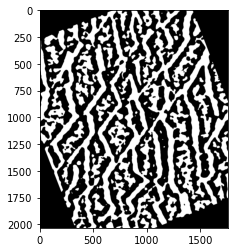

[[   0    0 1092]
 [   0    0 1093]
 [   0    0 1449]
 ...
 [   0 1699  437]
 [   0 1699  438]
 [   0 1699 1268]]
(1700, 1700)
Ran stack_to_gsd() in  1.8633198738098145 for gsd with  49755 particles
Ran debubble in  1.4092810153961182 for an image with shape  (1, 1700, 1700)
gsd_to_G canvas has shape  (1700, 1700)
[[   0 1093]]
(0, 40, array([[   0, 1093],
       [   0, 1092],
       [   1, 1091],
       [   2, 1090],
       [   3, 1089],
       [   4, 1088],
       [   5, 1087],
       [   6, 1086],
       [   7, 1085],
       [   8, 1084],
       [   9, 1083],
       [  10, 1082],
       [  11, 1081],
       [  12, 1081],
       [  13, 1081],
       [  14, 1082],
       [  15, 1082],
       [  16, 1082],
       [  17, 1082],
       [  18, 1082],
       [  19, 1082],
       [  20, 1082],
       [  21, 1082],
       [  22, 1082],
       [  23, 1082],
       [  24, 1082],
       [  25, 1082],
       [  26, 1082],
       [  27, 1082],
       [  28, 1081]], dtype=int16))
Ran gsd_to_G in  

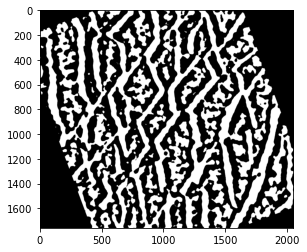

[[   0    0  150]
 [   0    0  585]
 [   0    0  586]
 ...
 [   0 1699 1601]
 [   0 1699 1665]
 [   0 1699 1666]]
(1700, 1700)
Ran stack_to_gsd() in  3.446547031402588 for gsd with  51269 particles
Ran debubble in  1.3512909412384033 for an image with shape  (1, 1700, 1700)
gsd_to_G canvas has shape  (1700, 1700)
[[  0 793]]
(1, 62, array([[  0, 880],
       [  0, 881],
       [  1, 882],
       [  2, 883],
       [  3, 884],
       [  4, 884],
       [  5, 884],
       [  6, 884],
       [  7, 884],
       [  8, 885],
       [  9, 885],
       [ 10, 885],
       [ 11, 885],
       [ 12, 885],
       [ 13, 885],
       [ 14, 886],
       [ 15, 886],
       [ 16, 886],
       [ 17, 885],
       [ 18, 885],
       [ 19, 886],
       [ 20, 886],
       [ 21, 886],
       [ 22, 886],
       [ 23, 886],
       [ 24, 887],
       [ 25, 887],
       [ 26, 887],
       [ 27, 887],
       [ 28, 887],
       [ 29, 887],
       [ 30, 887],
       [ 31, 886],
       [ 32, 886],
       [ 33, 887],


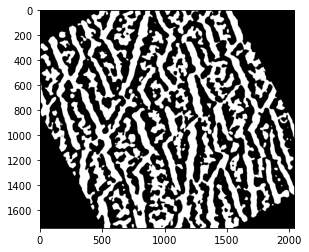

[[   0    0 1366]
 [   0    0 1367]
 [   0    1  192]
 ...
 [   0 1699 1546]
 [   0 1699 1547]
 [   0 1699 1548]]
(1700, 1700)
Ran stack_to_gsd() in  1.9218602180480957 for gsd with  45275 particles
Ran debubble in  1.359724998474121 for an image with shape  (1, 1700, 1700)
gsd_to_G canvas has shape  (1700, 1700)
[[   0 1367]]
(0, 47, array([[   0, 1367],
       [   0, 1366],
       [   1, 1365],
       [   2, 1364],
       [   3, 1363],
       [   4, 1362],
       [   5, 1361],
       [   6, 1362],
       [   7, 1362],
       [   8, 1362],
       [   9, 1362],
       [  10, 1363],
       [  11, 1363],
       [  12, 1362],
       [  13, 1363],
       [  14, 1363],
       [  15, 1363],
       [  16, 1363],
       [  17, 1362],
       [  18, 1363],
       [  19, 1363],
       [  20, 1363],
       [  21, 1363],
       [  22, 1363],
       [  23, 1364],
       [  24, 1364],
       [  25, 1364],
       [  26, 1364],
       [  27, 1364],
       [  28, 1364],
       [  29, 1364],
       [  30

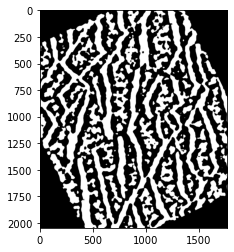

[[   0    0  219]
 [   0    0  220]
 [   0    0  311]
 ...
 [   0 1699 1217]
 [   0 1699 1218]
 [   0 1699 1219]]
(1700, 1700)
Ran stack_to_gsd() in  1.8748762607574463 for gsd with  43590 particles
Ran debubble in  1.4501302242279053 for an image with shape  (1, 1700, 1700)
gsd_to_G canvas has shape  (1700, 1700)
[[  0 219]]
(0, 22, array([[  0, 219],
       [  0, 220],
       [  1, 221],
       [  2, 222],
       [  3, 223],
       [  4, 224],
       [  5, 225],
       [  6, 226],
       [  7, 227],
       [  8, 228],
       [  9, 229],
       [ 10, 230],
       [ 11, 231],
       [ 12, 232],
       [ 13, 233],
       [ 14, 234],
       [ 15, 235],
       [ 16, 236],
       [ 17, 237],
       [ 18, 238],
       [ 19, 239]], dtype=int16))
Ran gsd_to_G in  4.596673011779785 for a graph with  1275 nodes.
pre sub has  1275  nodes
post sub has  225  nodes


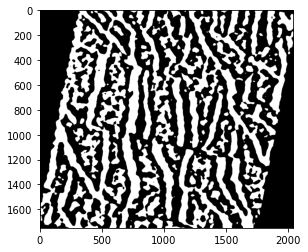

[[   0    0  347]
 [   0    0  348]
 [   0    0  349]
 ...
 [   0 1699  478]
 [   0 1699  479]
 [   0 1699  480]]
(1700, 1700)
Ran stack_to_gsd() in  1.8800098896026611 for gsd with  44502 particles
Ran debubble in  1.3773880004882812 for an image with shape  (1, 1700, 1700)
gsd_to_G canvas has shape  (1700, 1700)
[[  0 350]]
(0, 1, array([[  0, 350],
       [  0, 349],
       [  0, 348],
       [  0, 347],
       [  1, 346]], dtype=int16))
Ran gsd_to_G in  4.435780763626099 for a graph with  1375 nodes.
pre sub has  1375  nodes
post sub has  201  nodes


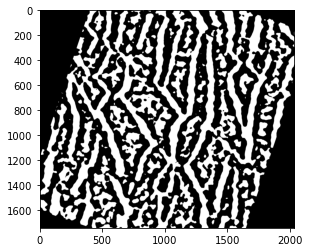

[[   0    0   99]
 [   0    0  100]
 [   0    0  937]
 ...
 [   0 1699  888]
 [   0 1699  889]
 [   0 1699  890]]
(1700, 1700)
Ran stack_to_gsd() in  1.9024131298065186 for gsd with  44463 particles
Ran debubble in  1.340528964996338 for an image with shape  (1, 1700, 1700)
gsd_to_G canvas has shape  (1700, 1700)
[[  0 100]]
(0, 23, array([[  0, 100],
       [  0,  99],
       [  1,  98],
       [  2,  97],
       [  3,  96],
       [  4,  95],
       [  5,  94],
       [  6,  93],
       [  7,  93],
       [  8,  93],
       [  9,  93],
       [ 10,  93],
       [ 11,  93],
       [ 12,  93],
       [ 13,  93],
       [ 14,  93],
       [ 15,  93],
       [ 16,  93],
       [ 17,  94],
       [ 18,  94],
       [ 19,  94]], dtype=int16))
Ran gsd_to_G in  4.310853004455566 for a graph with  1328 nodes.
pre sub has  1328  nodes
post sub has  243  nodes


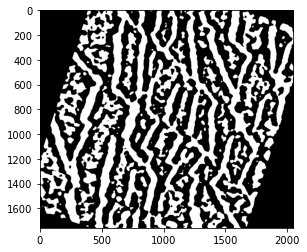

In [57]:
for i in (1,2,3,4,5,6,7):
    N = network.ResistiveNetwork('TestData/Mxene/'+str(i))
    N.stack_to_gsd(crop = [0,1700,0,1700], debubble=[disk(2)])
    N.G_u()

    N.Gr = base.sub_G(N.Gr)
    measuring_graph = base.add_weights(N, weight_type='Resistance', R_j=5)
    measuring_graph = base.add_weights(N, weight_type='Conductance', R_j=5)

    A = gyration_moments_3(measuring_graph,sampling=0.2)

    from scipy.spatial.transform import Rotation as R
    evals,rot_mat = np.linalg.eig(A)

    r = R.from_matrix(rot_mat)
    r = -r.as_rotvec(degrees=True)
    if evals[0]<evals[1]: r = r + 90
    if r[2] < 0: r = r + 360
        
    img_bin = cv.imread(N.stack_dir+'/slice0.tiff') #Original image
    image_center = tuple(np.array(img_bin.shape[1::-1]) / 2)
    rot_mat = cv.getRotationMatrix2D(image_center, r[2], 1.0)
    rot_img = cv.warpAffine(img_bin, rot_mat, img_bin.shape[1::-1], flags=cv.INTER_LINEAR)
    plt.imshow(rot_img)
    plt.show()

In [6]:
N.G_u()
N.potential_distribution(0, [0,20], [719-100,719], R_j='infinity')
path = N.Gr_connected.get_shortest_paths(0,to=200)
L = N.L
Q = np.linalg.pinv(L)
O_eff = Q[0,0]+Q[200,200]-2*Q[200,0]

gsd_to_G canvas has shape  (719, 719)
[[ 0 41]]
(0, 14, array([[ 0, 41],
       [ 0, 42],
       [ 0, 43],
       [ 0, 44],
       [ 0, 45],
       [ 0, 46],
       [ 0, 47],
       [ 0, 48],
       [ 0, 49],
       [ 0, 50],
       [ 1, 51],
       [ 1, 52],
       [ 1, 53],
       [ 1, 54],
       [ 1, 55],
       [ 1, 56],
       [ 1, 57],
       [ 1, 58],
       [ 1, 59],
       [ 1, 60],
       [ 1, 61],
       [ 1, 62],
       [ 1, 63],
       [ 1, 64],
       [ 1, 65],
       [ 1, 66],
       [ 1, 67],
       [ 1, 68],
       [ 1, 69],
       [ 1, 70],
       [ 1, 71],
       [ 1, 72],
       [ 1, 73],
       [ 2, 74],
       [ 2, 75],
       [ 3, 76],
       [ 4, 77],
       [ 4, 78],
       [ 4, 79],
       [ 3, 80],
       [ 2, 81],
       [ 2, 82],
       [ 2, 83],
       [ 2, 84],
       [ 2, 85],
       [ 2, 86],
       [ 2, 87]], dtype=int16))
Ran gsd_to_G in  2.10817813873291 for a graph with  2653 nodes.
pre sub has  2653  nodes
post sub has  2273  nodes
post sub has  2

In [53]:
print(np.array([rot_mat[:,1],rot_mat[:,0],rot_mat[:,2]]))
print(np.array([[0,-1,0],[1,0,0],[0,0,1]])*rot_mat)

[[-0.15181854 -0.98840838  0.        ]
 [-0.98840838  0.15181854  0.        ]
 [ 0.          0.          1.        ]]
[[-0.          0.15181854  0.        ]
 [ 0.15181854 -0.          0.        ]
 [ 0.          0.          1.        ]]


In [49]:
print((R.from_matrix(np.array([rot_mat[:,1],rot_mat[:,0],rot_mat[:,2]])).as_rotvec(degrees=True)))
print((R.from_matrix(rot_mat*np.array([[0,-1,0],[1,0,0],[0,0,1]]))).as_rotvec(degrees=True))
print((R.from_matrix(np.array([rot_mat.T[1],rot_mat.T[0],rot_mat.T[2]])).as_rotvec(degrees=True)))
print((R.from_matrix(np.array([rot_mat.T[1],rot_mat.T[0],rot_mat.T[2]]).T).as_rotvec(degrees=True)))
print((R.from_matrix(rot_mat)).as_rotvec(degrees=True))
r = r.as_rotvec(degrees=True)
r

[  0.   0. 180.]
[  0.   0. 180.]
[  0.   0. 180.]
[  0.   0. 180.]
[  0.           0.         171.40654661]


AttributeError: 'numpy.ndarray' object has no attribute 'as_rotvec'

In [238]:
#Check that an extrema occurs at this angle
#Note the angle given by r should align with an extrema at 360-r or 180-r
thetas = np.linspace(0,170,18)
Ax_df = []
Ay_df = []
for theta in thetas:
    M.stack_to_circular_gsd(500, rotate=theta, debubble=[disk(5)])
    M.G_u()
    M.Gr = base.sub_G(M.Gr)
    measuring_graph = base.add_weights(M, weight_type='Resistance', R_j=0)
    A = gyration_moments_3(measuring_graph,sampling=0.1)
    Ax_df.append(A[0,0])
    Ay_df.append(A[1,1])

    
df = pd.DataFrame(columns=['Theta', 'Ax','Ay'])
df['Theta'] = thetas
df['Ax'] = Ax_df
df['Ay'] = Ay_df

Ran stack_to_gsd() in  0.6367199420928955 for gsd with  89281 particles
Ran debubble in  0.9319629669189453 for an image with shape  (1, 1018, 1536)
gsd_to_G canvas has shape  (1000, 996)
[[  4 563]]
(0, 5, array([[  4, 563],
       [  4, 564],
       [  5, 565],
       [  5, 566],
       [  6, 567],
       [  7, 568],
       [  7, 569],
       [  7, 570],
       [  8, 571],
       [  7, 572],
       [  7, 573],
       [  8, 574],
       [  8, 575],
       [  8, 576],
       [  9, 577],
       [  9, 578],
       [  9, 579],
       [ 10, 580],
       [ 10, 581],
       [ 11, 582],
       [ 11, 583],
       [ 12, 584],
       [ 13, 585],
       [ 14, 586],
       [ 15, 587],
       [ 16, 588]], dtype=int16))
Ran gsd_to_G in  2.2028369903564453 for a graph with  1629 nodes.
pre sub has  1629  nodes
post sub has  1565  nodes
Ran stack_to_gsd() in  0.7413630485534668 for gsd with  93158 particles
Ran debubble in  0.9460086822509766 for an image with shape  (1, 1018, 1536)
gsd_to_G canvas ha

Ran stack_to_gsd() in  0.73236083984375 for gsd with  95226 particles
Ran debubble in  0.9416699409484863 for an image with shape  (1, 1018, 1536)
gsd_to_G canvas has shape  (998, 1000)
[[  3 446]]
(0, 7, array([[  3, 446],
       [  2, 447],
       [  2, 448],
       [  2, 449],
       [  3, 450],
       [  4, 451],
       [  5, 452],
       [  6, 453],
       [  7, 454],
       [  7, 455],
       [  8, 456],
       [  9, 457],
       [ 10, 458],
       [ 10, 459],
       [ 11, 460],
       [ 12, 460],
       [ 13, 461],
       [ 14, 461],
       [ 15, 462],
       [ 16, 462]], dtype=int16))
Ran gsd_to_G in  2.2436470985412598 for a graph with  1733 nodes.
pre sub has  1733  nodes
post sub has  1675  nodes
Ran stack_to_gsd() in  0.6825742721557617 for gsd with  92059 particles
Ran debubble in  0.9456381797790527 for an image with shape  (1, 1018, 1536)
gsd_to_G canvas has shape  (999, 999)
[[  1 551]]
(0, 3, array([[  1, 551],
       [  2, 551],
       [  3, 551],
       [  4, 551],
 

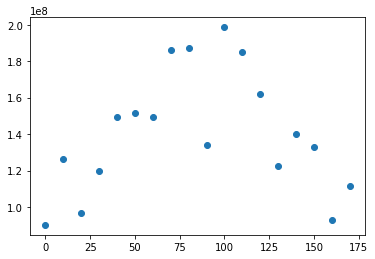

In [241]:
plt.scatter(df['Theta'],df['Ax'])
plt.show()

In [226]:
df/1000000

,Theta,Ax,Ay
0,0.000000,197.286108,515.328808
1,0.000021,157.911552,723.666323
2,0.000041,21.621193,73.279923
3,0.000062,256.900294,431.298436
4,0.000082,348.576360,355.635748
5,0.000103,521.752618,171.833988
6,0.000124,700.999157,138.071184
7,0.000144,523.937568,200.950803
8,0.000165,459.907748,403.389653
9,0.000185,304.703434,554.435952


In [136]:
_,rot_mat = np.linalg.eig(A)
r = R.from_matrix(rot_mat)
r = r.as_rotvec(degrees=True)
r

array([ 0.        ,  0.        , 36.67452502])

In [65]:
T=np.array([[30,5],[-0.01,50]])
np.linalg.eig(T)

(array([30.00250031, 49.99749969]),
 array([[-9.99999875e-01, -2.42564165e-01],
        [-5.00062453e-04, -9.70135365e-01]]))

In [63]:
A = [4,5]
np.matmul(T,A)

array([30., 50.])